# Libraries

In [55]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd


from scipy import signal
from scipy.io import wavfile

# from pybv import write_brainvision
from pyprep.prep_pipeline import PrepPipeline
from mne_icalabel import label_components

# Trigger lag fix

## parameters

In [56]:
# directory
input_dir = os.getcwd() + '/data/'
output_dir = os.getcwd() + '/preprocessed/1_trigger_lag_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# subjects to exclude
exclude_subs = [
]

# trigger searching window (actual trigger time based on audio - trigger time in the data)
t_left = -0.01
t_right = 0.5

Here we fix trigger lag fix and recode the event for item-level analysis.

Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data/codeswitch_836.vhdr...
Setting channel info structure...
Reading 0 ... 911229  =      0.000 ...  1822.458 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_836_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/3792870876.py:209: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_836_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_836_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data/codeswitch_837.vhdr...
Setting channel info structure...
Reading 0 ... 869389  =      0.000 ...  1738.778 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_837_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_837_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/3792870876.py:209: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_837_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data/codeswitch_838.vhdr...
Setting channel info structure...
Reading 0 ... 812939  =      0.000 ...  1625.878 secs...
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_838_corr.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_838_corr.fif
[done]
Extracting parameters from /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/data/codeswitch_839.vhdr...
Setting channel info structure...
Reading 0 ... 876379  =      0.000 ...  1752.758 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/3792870876.py:209: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_838_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_839_corr.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/3792870876.py:209: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_839_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_corr.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_839_corr.fif
[done]


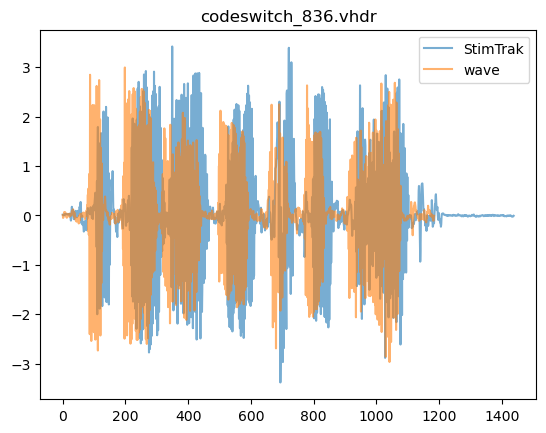

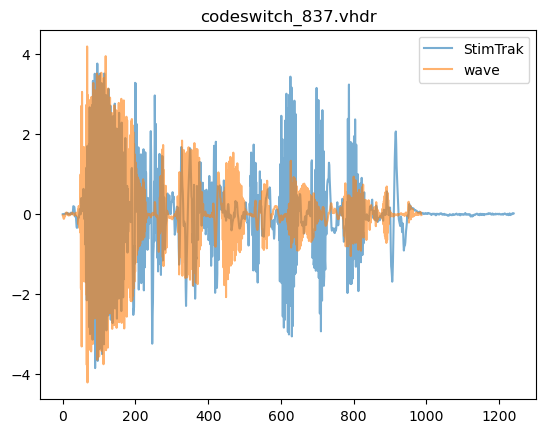

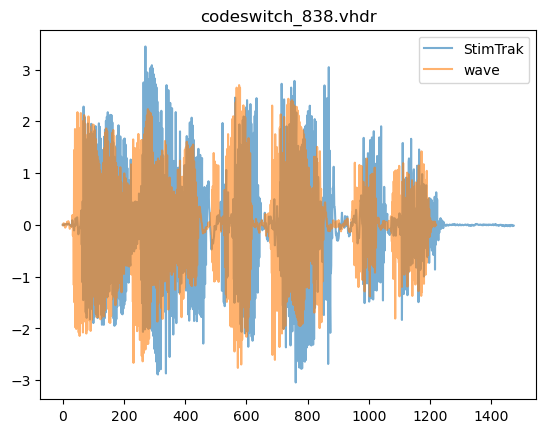

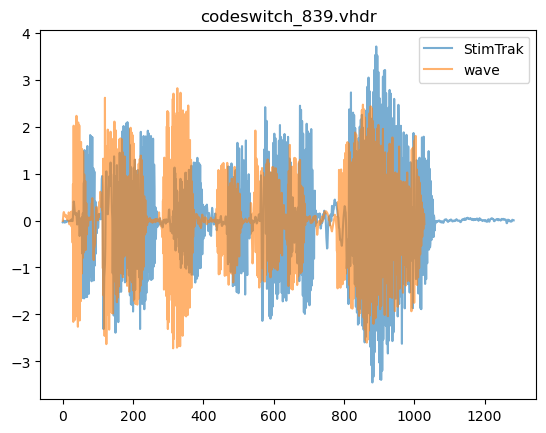

In [57]:
#### create dictionaries for item-level codes and descriptions ####
df = pd.read_csv("mapping_file.txt", delimiter='\t')
mapping_file2code = dict(zip(df['filename'], df['item_code']))
mapping_code2description = dict(zip(df['item_code'], df['description']))
#############################################################

# get list of file names
all_files = os.listdir(input_dir)

# for each file
for file in all_files:
    if file.endswith('.vhdr') and (file.split('.')[0] not in exclude_subs) and (file.split('.')[0]+ '_corr.fif' not in os.listdir(output_dir)):

        # read in vhdr files
        raw = mne.io.read_raw_brainvision(input_dir + file, preload = True)

        # extract sampling rate
        eeg_sfreq = raw.info['sfreq']

        #### get trigger code, audio data, and audio length ####
        
        # initialize dictionaries
        trigger_dict = {} # marker: [description list]
        audio = {} # filename: data
        lengths = {} # filename: audio length

        # read in the mapping file
        with open('mapping_file.txt','r') as f:
            # skip the first line (header)
            next(f)
            for line in f:
                # read in the current line
                line = line.replace('\n','')
                # get info
                filename, marker, description, item_code = line.split('\t')
        
                # initialize a filename list for each trigger code
                if marker not in trigger_dict.keys():
                    trigger_dict[marker] = []
                # add the filename to the list
                trigger_dict[marker].append(filename)

                # get audio data for each file
                if filename not in audio.keys():
                
                    # get sample rate and data of the audio file
                    sampleRate, data = wavfile.read('codeswitch_mystim/stimuli/{}'.format(filename))
            
                    # the sound file is stereo, so take only 1 channel's data
                    data = data[:,0]
            
                    # calculate sound file length
                    lengths[filename] = len(data)/sampleRate
            
                    # reduce the sampling rate of the audio file by the factor of int(sampleRate/eeg_sfreq)
                    data_downsampled = signal.decimate(data, int(sampleRate/eeg_sfreq), ftype='fir')
                    
                    # add audio data the audio dictionary
                    audio[filename] = data_downsampled
        ####################################################


        #### get events ####
        # for each stimulus, mark the block info
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')
        # only events with trigger code 1-4 are useful
        events_from_annot = events_from_annot[events_from_annot[:, 2] <= 4]
        ######################
        
        
        #### cross correction to find the audio file and correct lag correction ####
        
        # initialize
        delays = np.array([]) # a delay list
        bad_stim = [] # a bad stim list
        corr_results = [] # list of each event's max cross-correlation coefficient
        filename_results = [] # list of each event's filename
        
        # loop over each event
        for i in range(len(events_from_annot)):

            # get current event
            event = events_from_annot[i]
            # get the onset latency
            time = event[0]/eeg_sfreq
            # get the marker
            marker = str(event[2])

            # initialize dictonary of each file and its max correlation coefficent
            singleFile_maxCorr_dict = {}
            # initialize dictionary for each file and its lag corresponding to the max correlation coefficent
            singleFile_maxCorrLag_dict = {}

            #### find the audio file for the current event, recode the marker, and record the lag info ####
            for name in trigger_dict[marker]:
                
                # get the data from the sound channel
                audio_eeg = raw.get_data(
                    picks = ['StimTrak'],
                    tmin = time + t_left,
                    tmax = time + lengths[name] + t_right,
                )[0]
                
                # get actual stimulus data
                audio_stim = audio[name]
                
                # z-score normalization (subtract mean, divide by std)
                audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
                audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
            
                # cross-correlation
                corr = signal.correlate(audio_eeg, audio_stim, mode='full')
                # normalize for signal duration
                corr = corr / (np.linalg.norm(audio_eeg) * np.linalg.norm(audio_stim))
                # find peak correlation value
                singleFile_maxCorr_dict[name] = np.max(corr)

                # get lags for cross-correlation
                lags = signal.correlation_lags(
                    audio_eeg.size,
                    audio_stim.size,
                    mode="full")
                # find the lag for peak correlation
                singleFile_maxCorrLag_dict[name] = lags[np.argmax(corr)] + t_left*eeg_sfreq

            # get the file giving max correlation
            max_file = max(singleFile_maxCorr_dict, key=singleFile_maxCorr_dict.get)
            # get the maximum correlation among all files
            max_corr = singleFile_maxCorr_dict[max_file]
            # get the lag
            lag = singleFile_maxCorrLag_dict[max_file]
            # add item-level trigger code
            events_from_annot[i][2] = mapping_file2code[max_file]
                
            # if the maximum correction is less than a threshold
            if round(max_corr,1) < 0.5:
                # mark the stim bad
                bad_stim.append(i)

            # add the maximum correlation info for the current event
            corr_results.append(max_corr)
            filename_results.append(max_file)
            delays = np.append(delays,lag)
            ##################################################

        #### plot the stimtrak eeg and the audio data of the event with the minimum correlation of the current file ####

        # get min corr
        min_corr = np.argmin(corr_results)
        # get current event info
        event = events_from_annot[min_corr]
        # get the onset latency
        time = event[0]/eeg_sfreq
        # get the file name of the event
        name = filename_results[min_corr]
        # get the stimtrak data
        audio_eeg = raw.get_data(
            picks = ['StimTrak'],
            tmin = time + t_left,
            tmax = time + lengths[name] + t_right,
        )[0]
        # actual stimulus data
        audio_stim = audio[name]
        # z-score normalization (subtract mean, divide by std)
        audio_eeg = (audio_eeg - np.mean(audio_eeg)) / np.std(audio_eeg)
        audio_stim = (audio_stim - np.mean(audio_stim)) / np.std(audio_stim)
        # plot
        fig, ax = plt.subplots()
        ax.plot(audio_eeg, label = 'StimTrak', alpha = 0.6)
        ax.plot(audio_stim, label = 'wave', alpha = 0.6)
        ax.set_title(file)
        ax.legend()
        fig.savefig(output_dir + file.split('.')[0] + "_minCor.png", dpi=300, bbox_inches='tight')
        ##########################
                
        # record number of bad stims of the current file
        if len(bad_stim)>0:
            # wave the number of bad stims to a file
            with open(output_dir + 'bad_stim.txt', 'a+') as f:
                _ =f.write(file + '\t' + str(len(bad_stim)) + ' bad stims' + '\n')

        
        # remove events of bad stims
        events_from_annot = np.delete(events_from_annot, bad_stim, 0)
        
        # remove lags of bad stims
        delays = np.delete(delays, bad_stim, 0)

        # correct for trigger lag
        events_from_annot[:,0] = events_from_annot[:,0] + delays       
        
        # create item-level annotations
        annot_from_events = mne.annotations_from_events(
            events = events_from_annot,
            event_desc = mapping_code2description, # item-level mapping
            sfreq = eeg_sfreq
        )
        
        # set annotations
        raw.set_annotations(annot_from_events)
        
        # drop the audio channel in data
        raw.drop_channels(['StimTrak'])

        # save single-trial delay file
        np.savetxt(output_dir + file.replace('.vhdr', '_delays.txt'), delays, fmt='%i')
        
        # save as a file-into-file data
        raw.save(output_dir + file.split('.')[0]+ '_corr.fif')

# Bad channel correction
- filtering
- resampling
- remove line noise
- bad channel detection & repairing
- add back reference channel TP9

## parameters

In [58]:
#### parameters ####

# set directory
input_dir = os.getcwd() + '/preprocessed/1_trigger_lag_corrected/'
output_dir = os.getcwd() + '/preprocessed/2_bad_channel_corrected/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# filter cutoff frequencies (low/high)
f_low = 1
f_high = 100

# resampling frequency
f_res = 250

# line frequency
line_freq = 60

# preprocessing parameters
prep_params = {
    "ref_chs": 'eeg',
    "reref_chs": 'eeg', # average re-reference
    "line_freqs": np.arange(line_freq, f_res/2, line_freq),
}

# create a montage file for the pipeline
montage = mne.channels.make_standard_montage("standard_1020")

# interpolation method
# method=dict(eeg="spline")

In [59]:
#####################################################
#### Preprocessing (filtering, resampling, bad channel detection/interpoloation, re-reference) ####
#####################################################

# get all file namesin the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# for each file
for file in all_input:
    if file.endswith("corr.fif") and (file.split('.')[0]+ '_prep.fif' not in all_output):
        
        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)

        # set channel type for EOG channels
        raw.set_channel_types({'Fp1':'eog', 'Fp2':'eog'})

        # filter
        raw.filter(l_freq = f_low, h_freq = f_high)
        
        #### cut off the beginning and ending part ####b
        
        # get the onset of the first and the last event ####
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')

        #### crop the file to cut off the first the last 10s portion which maybe noisy ####
        # define the beginning time (in seconds)
        crop_start = events_from_annot[0][0]/raw.info['sfreq'] - 10

        # define the ending time (in seconds)
        crop_end = events_from_annot[-1][0]/raw.info['sfreq'] + 10

        # crop the data
        raw.crop(
            tmin=max(crop_start, raw.times[0]), 
            tmax=min(crop_end, raw.times[-1])
        )
        ####################################################################################
        
        # resample
        raw.resample(sfreq = f_res)

        # read in channel location info
        raw.set_montage(montage)
        
        ####  Use PrePipeline to preprocess ####
        '''
        1. detect and interpolate bad channels
        2. remove line noise
        3. re-reference
        '''

        # apply pyprep
        prep = PrepPipeline(raw, prep_params, montage, random_state=42)
        prep.fit()
        
        # export a txt file for the interpolated channel info
        with open(output_dir + 'bad_channel.txt', 'a+') as f:
            _ =f.write(
                file + ':\n' +
                "- Bad channels original: {}".format(prep.noisy_channels_original["bad_all"]) + '\n' +
                "- Bad channels after robust average reference: {}".format(prep.interpolated_channels) + '\n' +
                "- Bad channels after interpolation: {}".format(prep.still_noisy_channels) + '\n'
            )

        # save the pypred preprocessed data into the raw data structure
        raw = prep.raw

        # add back the reference channel
        raw = mne.add_reference_channels(raw,'TP9')

        # add the channel loc info (for the newly added reference channel)
        raw.set_montage(montage)
        
        # save
        raw.save(output_dir + file.split('.')[0]+ '_prep.fif')

Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_837_corr.fif...
Isotrak not found
    Range : 0 ... 869389 =      0.000 ...  1738.778 secs
Ready.
Reading 0 ... 869389  =      0.000 ...  1738.778 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:14: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_837_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:45: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Removed notch frequencies (Hz):
     60.00 : 9947 windows
    120.00 : 9947 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:08:35,045 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:08:50,517 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-03 12:08:50,627 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:09:05,864 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-03 12:09:05,987 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:09:20,919 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['T7'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7']}
2025-06-03 12:09:20,920 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['T7']

0 by correlation: []

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/344 [00:00<?,       ?it/s]


RANSAC done!
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_837_corr_prep.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:71: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:74: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp2', 'Fp1']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:77: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_837_corr_pre

Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_837_corr_prep.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_836_corr.fif...
Isotrak not found
    Range : 0 ... 911229 =      0.000 ...  1822.458 secs
Ready.
Reading 0 ... 911229  =      0.000 ...  1822.458 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:14: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_836_corr.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:45: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Removed notch frequencies (Hz):
     60.00 : 10498 windows
    120.00 : 10498 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:10:15,406 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': []}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:10:29,872 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'FT9', 'T7', 'T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'T7', 'T8', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-03 12:10:29,986 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:10:43,919 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'T7', 'T8', 'FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'T7', 'T8', 'FT9']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors


2025-06-03 12:10:44,032 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:10:57,920 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT10', 'T7', 'T8', 'FT9'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT10', 'T7', 'T8', 'FT9']}
2025-06-03 12:10:57,920 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!
Found 4 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

4 by correlation: ['FT9', 'T7', 'T8', 'FT10']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 25 sensor positions
Interpolating 4 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/363 [00:00<?,       ?it/s]


RANSAC done!
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_836_corr_prep.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_836_corr_prep.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_839_corr.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:71: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:74: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp2', 'Fp1']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:77: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_836_corr_pre

Isotrak not found
    Range : 0 ... 876379 =      0.000 ...  1752.758 secs
Ready.
Reading 0 ... 876379  =      0.000 ...  1752.758 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:45: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Removed notch frequencies (Hz):
     60.00 : 10063 windows
    120.00 : 10063 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:11:49,776 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['FT9', 'T7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['FT9', 'T7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:12:04,425 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['O2', 'Oz'], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['O2', 'T8', 'Oz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-03 12:12:04,529 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:12:18,710 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['O2', 'Oz'], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['O2', 'T8', 'Oz']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors


2025-06-03 12:12:18,813 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:12:33,299 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['O2', 'Oz'], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['O2', 'T8', 'Oz']}
2025-06-03 12:12:33,299 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 26 sensor positions
Interpolating 3 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!
Found 2 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

1 by HF noise: ['Oz']

1 by correlation: ['T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 27 sensor positions
Interpolating 2 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/348 [00:00<?,       ?it/s]


RANSAC done!
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_839_corr_prep.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_839_corr_prep.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/1_trigger_lag_corrected/codeswitch_838_corr.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:71: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:74: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp2', 'Fp1']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:77: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_839_corr_pre

Isotrak not found
    Range : 0 ... 812939 =      0.000 ...  1625.878 secs
Ready.
Reading 0 ... 812939  =      0.000 ...  1625.878 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:45: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp1', 'Fp2']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Removed notch frequencies (Hz):
     60.00 : 9251 windows
    120.00 : 9251 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:13:23,695 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': ['FC5', 'T7'], 'bad_by_correlation': [], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T7', 'FC5']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:13:37,091 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-03 12:13:37,198 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:13:50,951 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors


2025-06-03 12:13:51,070 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!


2025-06-03 12:14:04,482 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': [], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T8'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['T8']}
2025-06-03 12:14:04,482 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!
Found 1 uniquely bad channels:

0 by NaN: []

0 by flat: []

0 by deviation: []

0 by HF noise: []

1 by correlation: ['T8']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 93.4 mm
Computing interpolation matrix from 28 sensor positions
Interpolating 1 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/320 [00:00<?,       ?it/s]


RANSAC done!
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_838_corr_prep.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_838_corr_prep.fif
[done]


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:71: RuntimeWarning: Location for this channel is unknown or ambiguous; consider calling set_montage() after adding new reference channels if needed. Applying a montage will only set locations of channels that exist at the time it is applied.
  raw = mne.add_reference_channels(raw,'TP9')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:74: RuntimeWarning: Not setting positions of 2 eog channels found in montage:
['Fp2', 'Fp1']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/92325781.py:77: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_838_corr_pre

# ICA artifact subtraction

## parameters

In [60]:
# directory
input_dir = os.getcwd() + '/preprocessed/2_bad_channel_corrected/'
output_dir = os.getcwd() + '/preprocessed/3_ica/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# up to which IC you want to consider
ic_upto = 15
# ic_upto = 99

In [61]:
# get all file names in the folder
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# initialize a dictionary for files 
for file in all_input:
    if file.endswith("prep.fif") and (file.split('.')[0] + '_ica.fif' not in all_output): 

        # read in file
        raw = mne.io.read_raw_fif(input_dir + file, preload=True)
        
        # make a filtered file copy ICA. It works better on signals with 1 Hz high-pass filtered and 100 Hz low-pass filtered
        raw_filt = raw.copy().filter(l_freq = 1, h_freq = 100)
    
        # apply a common average referencing, to comply with the ICLabel requirements
        raw_filt.set_eeg_reference("average")
        
        # initialize ica parameters
        ica = mne.preprocessing.ICA(
            # n_components=0.999999,
            max_iter='auto', # n-1
            # use ‘extended infomax’ method for fitting the ICA, to comply with the ICLabel requirements
            method = 'infomax', 
            fit_params = dict(extended=True),
            random_state = 42,
        )
    
        #### get ica solution ####
        ica.fit(raw_filt, picks = ['eeg'])

        # save ica solutions
        ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')
        
        #### ICLabel ####
        ic_labels = label_components(raw_filt, ica, method="iclabel")

        # save
        with open(output_dir + file.split('.')[0]+ '_icLabels.pickle', 'wb') as f:
            pickle.dump(ic_labels, f)
        
        #### auto select brain AND other ####
        labels = ic_labels["labels"]
        exclude_idx = [
            idx for idx, label in enumerate(labels) if idx<ic_upto and label not in ["brain", "other"]
        ]
    
        # ica.apply() changes the Raw object in-place
        ica.apply(raw, exclude=exclude_idx)
    
        # record the bad ICs in bad_ICs.txt
        with open(output_dir + '/bad_ICs.txt', 'a+') as f:
            _ = f.write(file + '\t' + str(exclude_idx) + '\n')
    
        # save data after ICA
        raw.save(output_dir + file.split('.')[0]+ '_ica.fif')

Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_839_corr_prep.fif...
    Range : 0 ... 435454 =      0.000 ...  1741.816 secs
Ready.
Reading 0 ... 435454  =      0.000 ...  1741.816 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:10: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_839_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by non-zero PCA components: 26 components
Computing Extended Infomax ICA
Fitting ICA took 32.7s.
Writing ICA solution to /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_839_corr_prep_icaSolution.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:32: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_839_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (26 components)
    Zeroing out 6 ICA components
    Projecting back using 30 PCA components
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_839_corr_prep_ica.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:55: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_839_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_839_corr_prep_ica.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_837_corr_prep.fif...
    Range : 2291 ... 432295 =      9.164 ...  1729.180 secs
Ready.
Reading 0 ... 430004  =      0.000 ...  1720.016 secs...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:10: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_837_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(input_dir + file, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 62.7s.
Writing ICA solution to /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_837_corr_prep_icaSolution.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:32: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_837_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 8 ICA components
    Projecting back using 30 PCA components
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_837_corr_prep_ica.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_837_corr_prep_ica.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_836_corr_prep.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:55: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_837_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:10: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_836_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, 

    Range : 0 ... 454523 =      0.000 ...  1818.092 secs
Ready.
Reading 0 ... 454523  =      0.000 ...  1818.092 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by non-zero PCA components: 24 components
Computing Extended Infomax ICA
Fitting ICA took 31.4s.
Writing ICA solution to /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_836_corr_prep_icaSolution.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:32: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_836_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (24 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_836_corr_prep_ica.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_836_corr_prep_ica.fif
[done]
Opening raw data file /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_838_corr_prep.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:55: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_836_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')
/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:10: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/2_bad_channel_corrected/codeswitch_838_corr_prep.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, 

    Range : 132 ... 400231 =      0.528 ...  1600.924 secs
Ready.
Reading 0 ... 400099  =      0.000 ...  1600.396 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Fitting ICA to data using 30 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by non-zero PCA components: 27 components
Computing Extended Infomax ICA
Fitting ICA took 59.9s.
Writing ICA solution to /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_838_corr_prep_icaSolution.fif...


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:32: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_838_corr_prep_icaSolution.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(output_dir + file.split('.')[0]+ '_icaSolution.fif')


Applying ICA to Raw instance
    Transforming to ICA space (27 components)
    Zeroing out 8 ICA components
    Projecting back using 30 PCA components
Writing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_838_corr_prep_ica.fif
Closing /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_838_corr_prep_ica.fif


/var/folders/j8/8nyf6njj5nzfjcv6s23y3nn40000gn/T/ipykernel_36803/2919824864.py:55: RuntimeWarning: This filename (/Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/3_ica/codeswitch_838_corr_prep_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(output_dir + file.split('.')[0]+ '_ica.fif')


[done]


# Segmentation
segmenting continuous EEG into epochs
- re-reference
- segmentation

## parameters

In [62]:
#### parameters ####

# directory
input_dir = os.getcwd() + '/preprocessed/3_ica/'
output_dir = os.getcwd() + '/preprocessed/4_erp_epochs/' # for ERP 
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

# reject data
reject_subs = [
]

# Epoch window: 
erp_t_start = -0.2; erp_t_end = 0.8
baseline = (-0.2, 0)

# criteria to reject epoch
# reject_criteria = dict(eeg = 100e-6)       # 100 µV
# reject_criteria = dict(eeg = 150e-6)       # 150 µV
reject_criteria = dict(eeg=200e-6)       # 200 µV

In [64]:
# epochs for ERP
# initialize a list for subjects with too many bad trials
too_many_bad_trial_subjects = []

# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)


#### re-reference, and epoch ####
for file in all_input:
    
    if file.endswith("ica.fif") and (file.split('.')[0] + '_epo.fif' not in all_output):

        # skip the rejected subject
        if file.split('_')[1] in reject_subs:
            continue
        
        # read in data
        raw = mne.io.read_raw_fif(input_dir + file, preload = True)
        
        # average-mastoids re-reference
        raw.set_eeg_reference(ref_channels = ['TP9', 'TP10'])
        
        #### this is for source calculation ####
        # filter the data, optional
        # raw = raw.filter(l_freq=None, h_freq=30) 

        # sphere = mne.make_sphere_model('auto', 'auto', raw.info)
        # src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15.)
        # forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere)
        # raw = raw.set_eeg_reference('REST', forward=forward)
        ########################################

        
        # get event info for segmentation
        events_from_annot, event_dict = mne.events_from_annotations(raw, verbose='WARNING')
        
        # segmentation for ERP
        epochs = mne.Epochs(
            raw,
            events = events_from_annot, event_id = event_dict,
            tmin = erp_t_start, tmax = erp_t_end,
            # apply baseline correction
            baseline = baseline,
            # remove epochs that meet the rejection criteria
            reject = reject_criteria,
            preload = True,
        )


        # for each event, remove 0 trial events, record info, and check if a subject is bad
        for k, v in event_dict.items():
            
            # good trial count
            trial_count = len(epochs[k])
            
            # remove 0 trial event
            if trial_count==0:
                del epochs.event_id[k]
                
            # good trial rate
            goodTrial_rate = round( trial_count/sum(events_from_annot[:,2]==v), 2 )
            
            # record epoch summary
            with open(output_dir + 'epoch_summary.txt', 'a+') as f:
                _ =f.write(file.split('_')[1] + '\t' + k + '\t' + str(trial_count) + '\t' + str(goodTrial_rate) + '\n')

            # mark a subject bad if any condition has fewer than 1/2 trials
            if ( goodTrial_rate < 0.5 ):
                # mark the subject file as bad
                if file.split('_')[1] not in too_many_bad_trial_subjects:
                    too_many_bad_trial_subjects.append(file.split('_')[1])

        
        # save single subject file
        epochs.save(output_dir + file.split('.')[0] + '_epo.fif',
                   overwrite=True)


# export the record of bad subjects for ERP
with open(output_dir + 'too_many_bad_trial_subjects.txt', 'w') as file:
    # Write each item in the list to the file
    for item in too_many_bad_trial_subjects:
        file.write(item + '\n')

# ERP

## parameters

In [65]:
# directory
input_dir = os.getcwd() + '/preprocessed/4_erp_epochs/'
output_dir = os.getcwd() + '/preprocessed/5_averaged/'
# create a folder if the folder doesn't exist
os.makedirs(output_dir, exist_ok=True)

In [66]:
#### get ERP ####

# get file names
all_input = os.listdir(input_dir)
all_output = os.listdir(output_dir)

# initialize a dictionary to store data
all_evokeds = {}

# bad subjects with 0 good trials in any condition
bad_subs = [
]

# for each file
for file in all_input:
    
    if file.endswith("_epo.fif"):
        
        # extract subject number
        subject = file.split('_')[1]
        
        # skip rejected subjects
        if subject in bad_subs:
            continue
        
        # read in data
        epochs = mne.read_epochs(input_dir + file, preload = True)
        
        # average | get ERP for each condition
        evoked = epochs.average(by_event_type=True)

        # initialize dictionary for single-subject ERP
        all_evokeds[file.split('_')[1]] = {}

        # add key for each condition for analysis
        for cond in evoked:
            # append the evoked data to the dictioncary of evoked data
            all_evokeds[file.split('_')[1]][cond.comment] = cond

# Saving the ERP data:
with open(output_dir + '/all_evokeds.pkl', 'wb') as f:
    pickle.dump(all_evokeds, f)
# del all_evokeds

Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/4_erp_epochs/codeswitch_838_corr_prep_ica_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/4_erp_epochs/codeswitch_836_corr_prep_ica_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/chaohan/Library/CloudStorage/OneDrive-UniversityofToronto/Projects/codeswitch/preprocessed/4_erp_epochs/codeswitch_839_corr_prep_ica_epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.0

# Visulization

## parameters

In [67]:
# directory
input_dir = os.getcwd() + '/preprocessed/5_averaged/'

# participants to exclude
exclude_ppts = []

## single-participant, single-condition butterfly

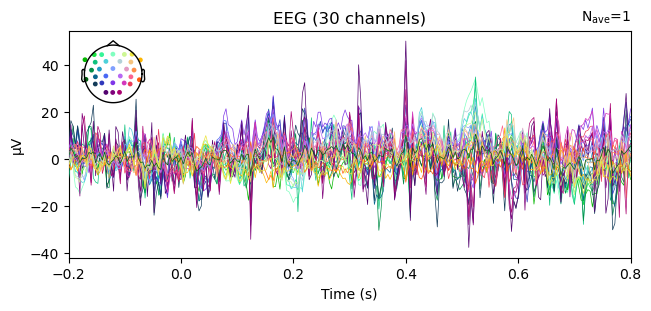

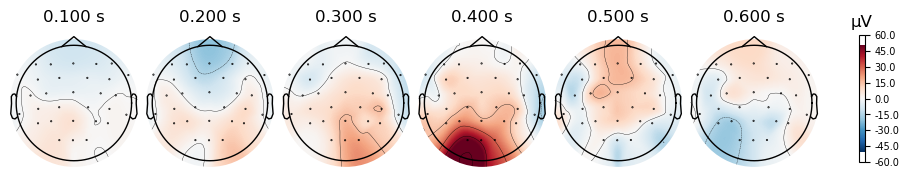

In [69]:
#| output: true

# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:  # Python 3: open(..., 'rb')
    all_evokeds = pickle.load(file)

# get data
evoked = all_evokeds['836']['local_noswitch_lunchbox']

# waveform
evoked.plot()

# scalp topography
times = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
evoked.plot_topomap(times=times, colorbar=True)

plt.show()

## topographical subplots

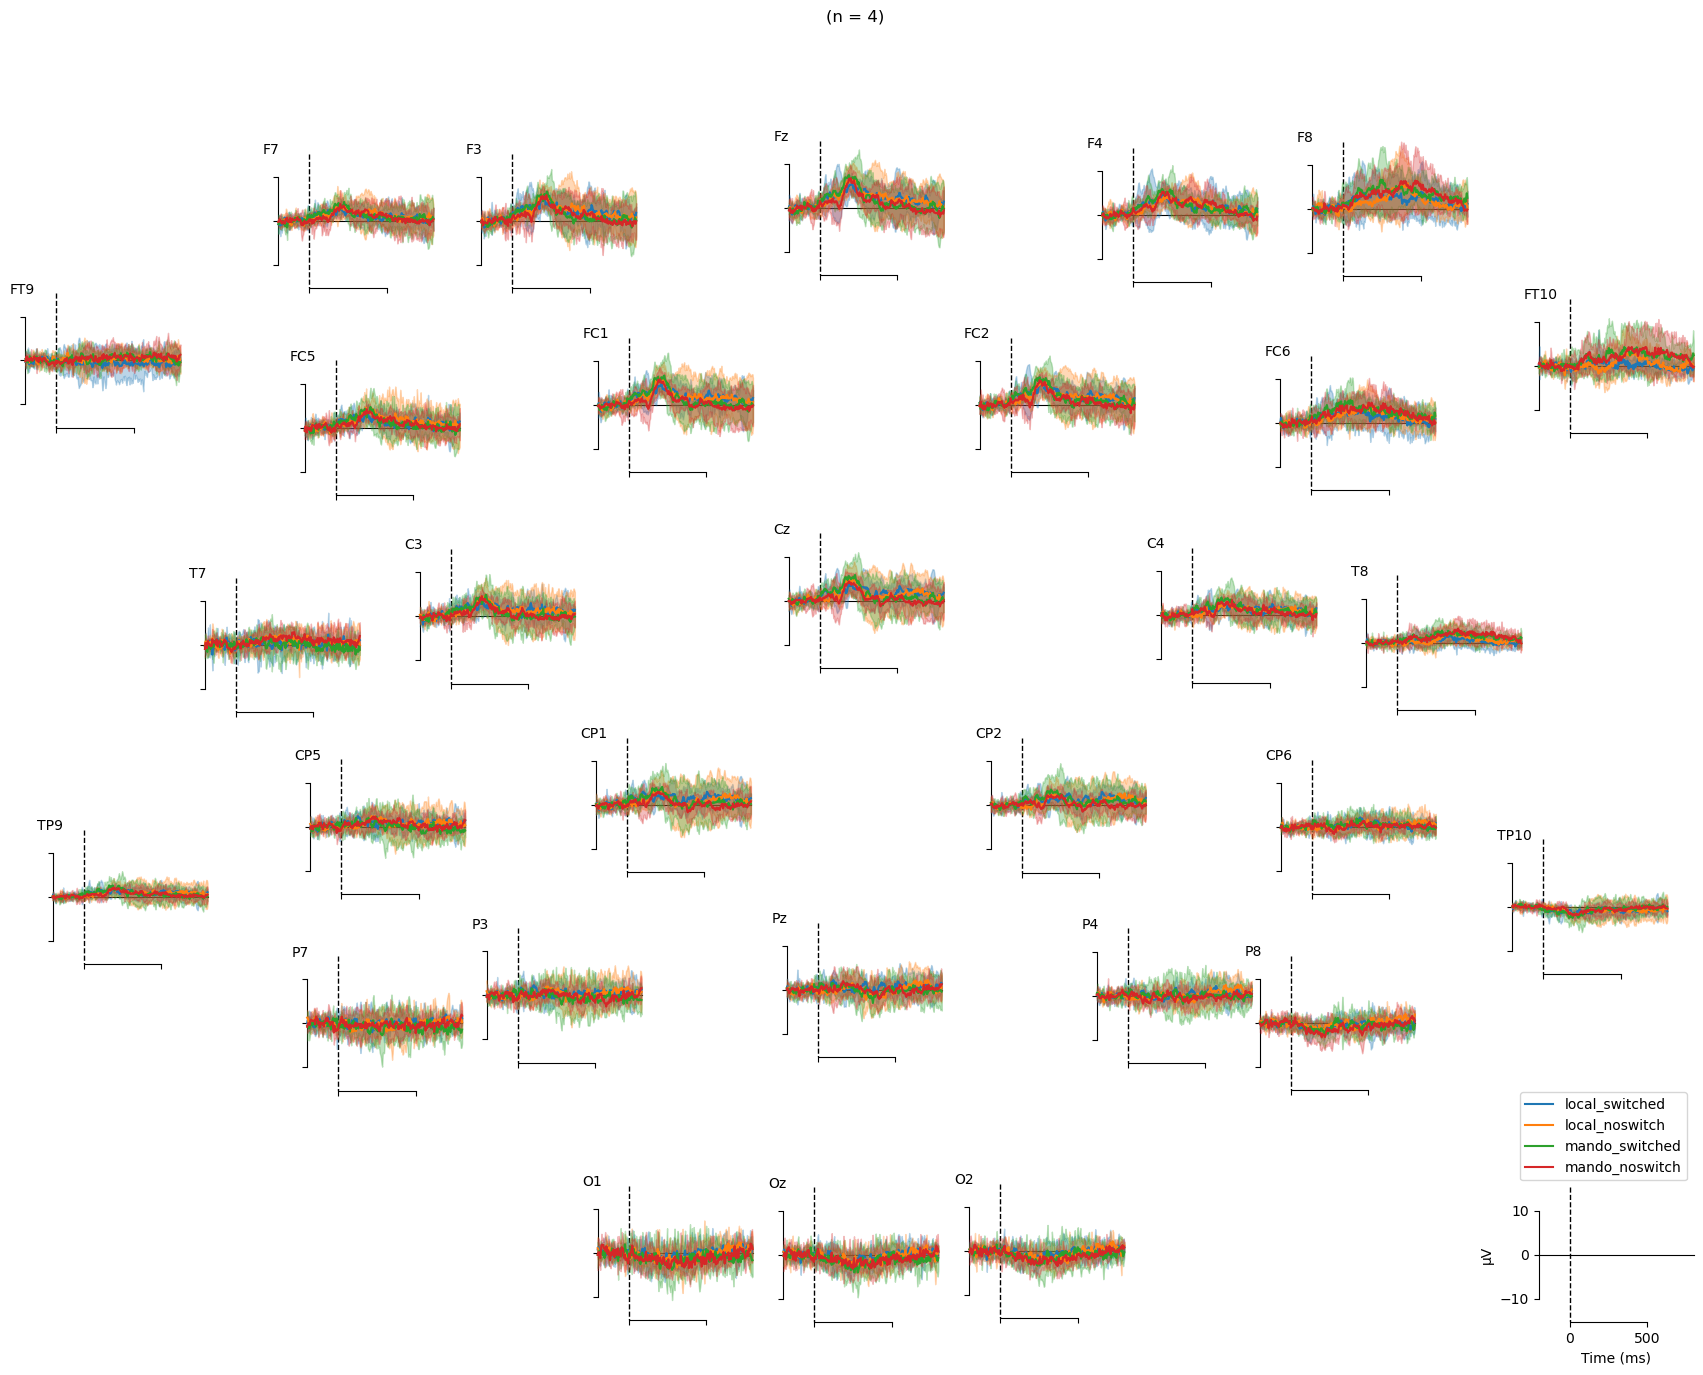

In [100]:
#| output: true

# read in the ERP data:
with open(input_dir + '/all_evokeds.pkl', 'rb') as file:
    all_evokeds = pickle.load(file)

# get the list of all participants that came this far
all_ppts = list(all_evokeds.keys())

# get participants that meet criteria
sub_ppts = []
for ppt in all_ppts:
    # if it is not in the bad subject list # 
    if ppt not in exclude_ppts:
        # append that subject to the list
        sub_ppts.append(ppt)



# extract ERPs for each condition
local_switched = []
local_noswitch = []
mando_switched = []
mando_noswitch = []

# for each participant
for ppt in sub_ppts:

    # extract item labels
    items = all_evokeds[ppt].keys()

    for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
        # get condition list
        cond_list = [ x for x in items if x.rsplit('_', 1)[0]==cond ]

        # compute erp
        tmp= mne.combine_evoked([all_evokeds[ppt][x] for x in cond_list],
                                     weights='equal')
        # append erp to list
        eval(cond).append(tmp)

# add erp data to dictionary for plotting
evokeds = {}
for cond in ['local_switched', 'local_noswitch', 'mando_switched', 'mando_noswitch']:
    evokeds[cond] = eval(cond)



################################
#### Topographical subplots ####

# figure title for the waveform
waveform_title = '(n = ' + str(len(sub_ppts)) + ')'

# waveforms across scalp topo
# NOTE: I don't know how to save these plots using the code
fig = mne.viz.plot_compare_evokeds(
    evokeds,
    axes='topo',
    # picks=pick_chans,
    # combine="mean",
    show_sensors=True,
    # colors=colors,
    title = waveform_title,
    # ylim=dict(eeg=[-5, 5]),
    time_unit="ms",
    show=False,
);
##############################